# Libraries

In [27]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet
from matplotlib import cm, colors

In [3]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

In [2]:
pwd

'/Users/ricardo/Documents/GitHub/Hospitals-Access-Peru/code'

# Reading, handling and processing IPRESS.csv

In [106]:
base = open('../data/IPRESS.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']
charenc

'MacRoman'

In [107]:
csv_data = pd.read_csv('../data/IPRESS.csv', encoding=charenc)


In [108]:
#csv_data = csv_data[['UBIGEO','InstituciÛn', 'Nombre del establecimiento', 'ClasificaciÛn', 'Departamento', 'Provincia', 'Distrito', 'Estado' ,'NORTE' ,'ESTE']]
csv_data.rename(columns={'InstituciÛn':'INSTITUCIÓN', 'Nombre del establecimiento': 'NOMBRE DEL ESTABLECIMIENTO', 'ClasificaciÛn':'CLASIFICACION', 'Departamento':'DEPARTAMENTO', 'Provincia':'PROVINCIA', 'Distrito':'DISTRITO', 'Estado':'ESTADO' ,'NORTE':'LATITUD' ,'ESTE':'LONGITUD'}, inplace=True)
cleaned_csv = csv_data.loc[csv_data['ESTADO'] == 'ACTIVADO'].dropna(subset=['LATITUD', 'LONGITUD'])
cleaned_csv.head()

,INSTITUCIÓN,CÛdigo ⁄nico,NOMBRE DEL ESTABLECIMIENTO,CLASIFICACION,Tipo,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,DirecciÛn,...,Inicio de Actividad,Director MÈdico y/o Responsable de la AtenciÛn de Salud,ESTADO,SituaciÛn,CondiciÛn,InspecciÛn,LATITUD,LONGITUD,COTA,CAMAS
1,GOBIERNO REGIONAL,7050,AMBATO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,CAJAMARCA,CUTERVO,SANTA CRUZ,60611,COMUNIDAD DE AMBATO,...,29/06/2006,IDELSO MENOR CHAVEZ,ACTIVADO,,EN FUNCIONAMIENTO,,-78.858380,-6.133523,1724.0,NaN
2,GOBIERNO REGIONAL,99,SANTA ISABEL DE YUMBATURO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LORETO,LORETO,PARINARI,160302,ACTUALIZAR,...,01/01/1900,JULIO TONY CAITIMARI MACHOA,ACTIVADO,,EN FUNCIONAMIENTO,,-74.258139,-4.581509,124.0,NaN
6,MINSA,7278,PUESTO DE SALUD HEROES DEL CENEPA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,LIMA,VILLA EL SALVADOR,150142,"JR. HEROES DEL CENEPA MZ C LT 20, ALT DE PANAM...",...,01/02/2008,BASTIDAS CAMARENA HUBERT ALEX . .,ACTIVADO,,EN FUNCIONAMIENTO,,-76.930608,-12.248699,NaN,NaN
12,GOBIERNO REGIONAL,5460,NUEVA BETANIA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,OTROS CC.NN. NUEVA BETANIA S/N N⁄MERO S/N DIST...,...,20/12/2000,MARIANA VASQUEZ PINEDO,ACTIVADO,,EN FUNCIONAMIENTO,,-74.296531,-8.398366,177.0,NaN
15,GOBIERNO REGIONAL,6431,PONGO ISLA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,SAN MARTIN,SAN MARTIN,HUIMBAYOC,220907,OTROS CP PONGO ISLA DISTRITO HUIMBAYOC PROVINC...,...,14/09/2001,MIRLANDA MOZOMBITE BARDALES,ACTIVADO,,EN FUNCIONAMIENTO,,-75.885812,-6.438298,172.1,NaN


In [109]:
cleaned_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7956 entries, 1 to 20818
Data columns (total 33 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   INSTITUCIÓN                                              7956 non-null   object 
 1   CÛdigo ⁄nico                                             7956 non-null   int64  
 2   NOMBRE DEL ESTABLECIMIENTO                               7956 non-null   object 
 3   CLASIFICACION                                            7951 non-null   object 
 4   Tipo                                                     7956 non-null   object 
 5   DEPARTAMENTO                                             7956 non-null   object 
 6   PROVINCIA                                                7956 non-null   object 
 7   DISTRITO                                                 7956 non-null   object 
 8   UBIGEO                          

# Distritos Shape file 

In [110]:
maps = gpd.read_file('../data/distritos/DISTRITOS.shp')
maps = maps[['IDDIST', 'geometry']]
maps = maps.rename({'IDDIST':'UBIGEO'}, axis = 1 )
maps['UBIGEO'] = maps['UBIGEO'].astype(str).astype(int)
maps

,UBIGEO,geometry
0,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,100904,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,250305,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,250302,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,250304,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...
1868,100608,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."
1869,100609,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010..."
1870,100610,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886..."
1871,211105,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."


#### Making sure the format is WGS-84 (EPSG:4326)

In [111]:
maps = maps.to_crs(epsg=4326)
maps.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Merged data

In [112]:
final_dataset = pd.merge(maps, cleaned_csv, how="left", on="UBIGEO")
final_dataset

,UBIGEO,geometry,INSTITUCIÓN,CÛdigo ⁄nico,NOMBRE DEL ESTABLECIMIENTO,CLASIFICACION,Tipo,DEPARTAMENTO,PROVINCIA,DISTRITO,...,Inicio de Actividad,Director MÈdico y/o Responsable de la AtenciÛn de Salud,ESTADO,SituaciÛn,CondiciÛn,InspecciÛn,LATITUD,LONGITUD,COTA,CAMAS
0,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...",GOBIERNO REGIONAL,927.0,CODO DEL POZUZO,CENTROS DE SALUD O CENTROS MEDICOS,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,HUANUCO,PUERTO INCA,CODO DEL POZUZO,...,08/06/2004,HENRY ROJAS CASTA—EDA,ACTIVADO,,EN FUNCIONAMIENTO,,-75.463665,-9.669402,NaN,NaN
1,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...",GOBIERNO REGIONAL,1106.0,HUAMPOMAYO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,HUANUCO,PUERTO INCA,CODO DEL POZUZO,...,02/02/2001,JESSICA MABEL PI—AN PAREDES,ACTIVADO,,EN FUNCIONAMIENTO,,-75.591200,-9.969250,1600.0,NaN
2,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...",GOBIERNO REGIONAL,930.0,CHORROPAMPA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,HUANUCO,PUERTO INCA,CODO DEL POZUZO,...,08/06/2004,VICTOR RAUL PONCIANO ESTELA,ACTIVADO,,EN FUNCIONAMIENTO,,-75.394620,-9.850610,320.0,NaN
3,100904,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...",GOBIERNO REGIONAL,916.0,PRINCIPE DE PAZ,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,HUANUCO,PUERTO INCA,TOURNAVISTA,...,14/09/1994,JESUS MANUEL RAFAEL ESPINOZA,ACTIVADO,,EN FUNCIONAMIENTO,,-74.683542,-8.995790,273.7,NaN
4,100904,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...",GOBIERNO REGIONAL,912.0,TOURNAVISTA,CENTROS DE SALUD O CENTROS MEDICOS,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,HUANUCO,PUERTO INCA,TOURNAVISTA,...,31/05/1994,ROCIO CAMPOS CERRON,ACTIVADO,,EN FUNCIONAMIENTO,,-74.702805,-8.934338,206.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7962,150806,"POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...",GOBIERNO REGIONAL,5685.0,PE—ICO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,HUAURA,HUAURA,...,01/01/1900,EDY ELODIA MARIN GARCIA,ACTIVADO,,EN FUNCIONAMIENTO,,-77.437500,-10.931177,594.0,NaN
7963,150806,"POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...",ESSALUD,10392.0,CENTRO DE ATENCION PRIMARIA I HUMAYA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,HUAURA,HUAURA,...,15/02/1944,JAVIER IVAN HENOSTROZA CACERES,ACTIVADO,,EN FUNCIONAMIENTO,,-77.409616,-11.098534,NaN,NaN
7964,150806,"POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...",GOBIERNO REGIONAL,5684.0,VILCAHUAURA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,HUAURA,HUAURA,...,01/01/1900,MARIA VICTORIA ECHENIQUE GARCIA,ACTIVADO,,EN FUNCIONAMIENTO,,-77.474190,-11.072751,264.0,NaN
7965,150806,"POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...",GOBIERNO REGIONAL,5683.0,HUMAYA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,HUAURA,HUAURA,...,06/11/1996,MIRTHA MARY CALDERON BARRETO,ACTIVADO,,EN FUNCIONAMIENTO,,-77.409943,-11.099675,NaN,NaN


In [113]:
# borrar

final_dataset[final_dataset['DISTRITO'].isna()]



,UBIGEO,geometry,INSTITUCIÓN,CÛdigo ⁄nico,NOMBRE DEL ESTABLECIMIENTO,CLASIFICACION,Tipo,DEPARTAMENTO,PROVINCIA,DISTRITO,...,Inicio de Actividad,Director MÈdico y/o Responsable de la AtenciÛn de Salud,ESTADO,SituaciÛn,CondiciÛn,InspecciÛn,LATITUD,LONGITUD,COTA,CAMAS
190,180302,"POLYGON ((-71.25935 -17.43995, -71.25730 -17.4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,210404,"POLYGON ((-69.31035 -16.57016, -69.30993 -16.5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,210402,"POLYGON ((-69.04722 -16.54880, -69.04686 -16.5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
488,40407,"POLYGON ((-72.29645 -15.84088, -72.29646 -15.8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489,40605,"POLYGON ((-72.54087 -15.82484, -72.53947 -15.8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
513,40411,"POLYGON ((-72.49976 -15.69611, -72.49877 -15.6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
520,40412,"POLYGON ((-72.38527 -15.62673, -72.38529 -15.6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528,40601,"POLYGON ((-72.70687 -15.63035, -72.70282 -15.6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
543,40410,"POLYGON ((-72.65764 -15.54791, -72.65604 -15.5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
544,40414,"POLYGON ((-72.56239 -15.53799, -72.56167 -15.5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
### borrar despues
final_dataset['CondiciÛn'].value_counts()

CondiciÛn
EN FUNCIONAMIENTO    7894
INOPERATIVO            14
Name: count, dtype: int64

In [115]:
# borrar despues 

final_dataset.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7967 entries, 0 to 7966
Data columns (total 34 columns):
 #   Column                                                   Non-Null Count  Dtype   
---  ------                                                   --------------  -----   
 0   UBIGEO                                                   7967 non-null   int64   
 1   geometry                                                 7967 non-null   geometry
 2   INSTITUCIÓN                                              7908 non-null   object  
 3   CÛdigo ⁄nico                                             7908 non-null   float64 
 4   NOMBRE DEL ESTABLECIMIENTO                               7908 non-null   object  
 5   CLASIFICACION                                            7903 non-null   object  
 6   Tipo                                                     7908 non-null   object  
 7   DEPARTAMENTO                                             7908 non-null   object  
 8   PROVINCIA 

In [117]:
final_dataset['DISTRITO'].value_counts()

DISTRITO
CALLERIA         59
CUTERVO          56
CALLAO           51
INDEPENDENCIA    39
IMAZA            39
                 ..
CAPILLAS          1
COCHAPETI         1
TAPACOCHA         1
CANIS             1
LLALLI            1
Name: count, Length: 1672, dtype: int64

# Task 1: Static maps: count of hospitals by district

#### Map 1: Total public hospitals per district.

In [118]:
def tmap_1 (b, c):
    if c == 'all-peru':
        result = final_dataset.loc[(final_dataset['INSTITUCIÓN'] != 'PRIVADO') & (final_dataset['INSTITUCIÓN'] != 'OTRO') & (final_dataset['CondiciÛn'] == b)]
    else:
        result = final_dataset.loc[(final_dataset['INSTITUCIÓN'] != 'PRIVADO') & (final_dataset['INSTITUCIÓN'] != 'OTRO') & (final_dataset['DISTRITO'] == c)]
    return result

In [119]:
x = tmap_1('EN FUNCIONAMIENTO' , 'all-peru')
conteo = x['DISTRITO'].value_counts().rename_axis('DISTRITO').reset_index(name='CANTIDAD')

In [120]:
x['DISTRITO'] = x['DISTRITO'].str.strip().str.upper()
base = x.merge(conteo, on='DISTRITO', how='left')
base['CANTIDAD'] = base['CANTIDAD'].fillna(0).astype(int)

/opt/anaconda3/envs/geoesp_analysis/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


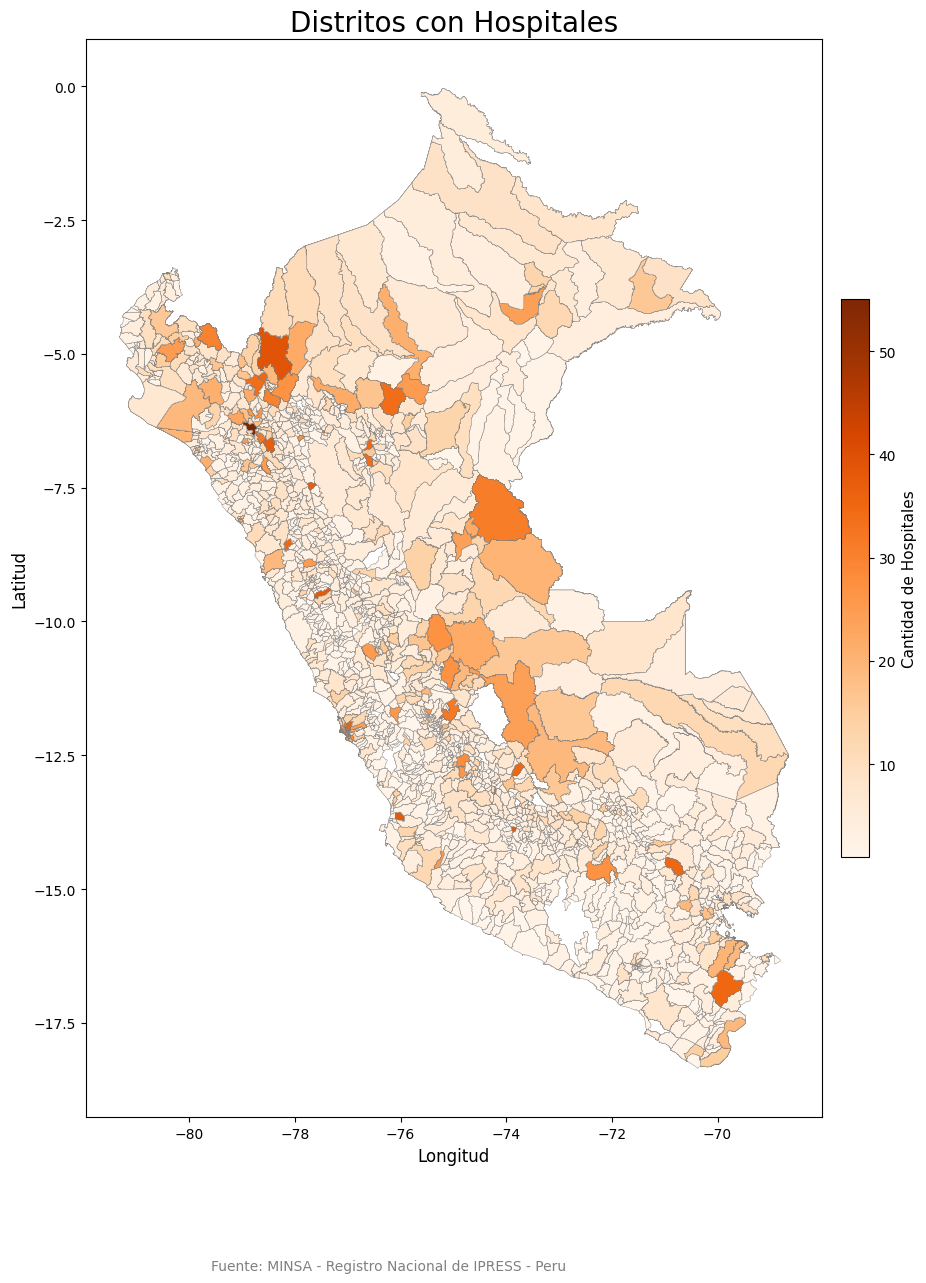

In [121]:
fig, ax = plt.subplots(figsize=(12, 14))
base.plot(
    column='CANTIDAD',
    cmap='Oranges',
    linewidth=0.3,
    edgecolor='gray',
    legend=False,
    ax=ax
)

ax.set_title('Distritos con Hospitales', fontsize=20)


norm = colors.Normalize(vmin=base['CANTIDAD'].min(), vmax=base['CANTIDAD'].max())
sm = cm.ScalarMappable(cmap='Oranges', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)
cbar.set_label('Cantidad de Hospitales', fontsize=11)

ax.set_xlabel("Longitud", fontsize=12)
ax.set_ylabel("Latitud", fontsize=12)


fig.text(
    0.5, 0.001, "Fuente: MINSA - Registro Nacional de IPRESS - Peru",
    ha="center", fontsize=10, color="gray"
)

plt.show()

In [122]:
fig.savefig("../output/map_1.png", dpi=300, bbox_inches='tight')


#### Map 2: Highlight districts with zero hospitals

In [141]:
def tmap_2 (c):
    if c == 'all-peru':
        result = final_dataset.loc[(final_dataset['INSTITUCIÓN'] != 'PRIVADO') & (final_dataset['INSTITUCIÓN'] != 'OTRO')]
    else:
        result = final_dataset.loc[(final_dataset['INSTITUCIÓN'] != 'PRIVADO') & (final_dataset['INSTITUCIÓN'] != 'OTRO') & (final_dataset['DISTRITO'] == c)]
    return result

In [142]:
y = tmap_1('INOPERATIVO' , 'all-peru')
conteo_y = final_dataset[final_dataset['DISTRITO'].isna()]
conteo_y.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 59 entries, 190 to 7915
Data columns (total 34 columns):
 #   Column                                                   Non-Null Count  Dtype   
---  ------                                                   --------------  -----   
 0   UBIGEO                                                   59 non-null     int64   
 1   geometry                                                 59 non-null     geometry
 2   INSTITUCIÓN                                              0 non-null      object  
 3   CÛdigo ⁄nico                                             0 non-null      float64 
 4   NOMBRE DEL ESTABLECIMIENTO                               0 non-null      object  
 5   CLASIFICACION                                            0 non-null      object  
 6   Tipo                                                     0 non-null      object  
 7   DEPARTAMENTO                                             0 non-null      object  
 8   PROVINCIA      

In [143]:

y['DISTRITO'] = y['DISTRITO'].str.strip().str.upper()
base_y = y.merge(conteo_y, on='DISTRITO', how='left')


/opt/anaconda3/envs/geoesp_analysis/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [144]:
base_y

,UBIGEO_x,geometry_x,INSTITUCIÓN_x,CÛdigo ⁄nico_x,NOMBRE DEL ESTABLECIMIENTO_x,CLASIFICACION_x,Tipo_x,DEPARTAMENTO_x,PROVINCIA_x,DISTRITO,...,Inicio de Actividad_y,Director MÈdico y/o Responsable de la AtenciÛn de Salud_y,ESTADO_y,SituaciÛn_y,CondiciÛn_y,InspecciÛn_y,LATITUD_y,LONGITUD_y,COTA_y,CAMAS_y
0,60601,"POLYGON ((-78.98739 -6.26824, -78.98665 -6.268...",GOBIERNO REGIONAL,4999.0,LAS PALMAS DE TINYAYOC,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,CAJAMARCA,CUTERVO,CUTERVO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,140306,"POLYGON ((-79.90444 -6.47594, -79.90604 -6.476...",GOBIERNO REGIONAL,4423.0,TRANCA FANUPE,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LAMBAYEQUE,LAMBAYEQUE,MORROPE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,160603,"POLYGON ((-74.63721 -7.57180, -74.63129 -7.579...",GOBIERNO REGIONAL,173.0,PAHOYAN,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LORETO,UCAYALI,PADRE MARQUEZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21101,"POLYGON ((-77.87542 -9.81116, -77.87358 -9.811...",GOBIERNO REGIONAL,1741.0,HUARMEY,HOSPITALES O CLINICAS DE ATENCION GENERAL,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,ANCASH,HUARMEY,HUARMEY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,160501,"POLYGON ((-73.93590 -5.00931, -73.93325 -5.010...",GOBIERNO REGIONAL,293.0,CAROCURAHUAYTE,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LORETO,REQUENA,REQUENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,21308,"POLYGON ((-77.29376 -8.84022, -77.29128 -8.842...",GOBIERNO REGIONAL,1792.0,PUESTO DE SALUD MUSGA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,ANCASH,MARISCAL LUZURIAGA,MUSGA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,150724,"POLYGON ((-76.53585 -11.73515, -76.53565 -11.7...",GOBIERNO REGIONAL,5894.0,HUINCO,CENTROS DE SALUD O CENTROS MEDICOS,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,HUAROCHIRI,CASTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,150719,"POLYGON ((-76.49945 -11.67212, -76.49797 -11.6...",GOBIERNO REGIONAL,5892.0,SAN JUAN DE IRIS,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,HUAROCHIRI,SAN JUAN DE IRIS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,61201,"POLYGON ((-78.81271 -7.01913, -78.81216 -7.019...",GOBIERNO REGIONAL,4578.0,CALLANCAS,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,CAJAMARCA,SAN PABLO,SAN PABLO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,61108,"POLYGON ((-79.26008 -6.88192, -79.25845 -6.882...",GOBIERNO REGIONAL,4533.0,CARAHUASI,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,CAJAMARCA,SAN MIGUEL,NANCHOC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


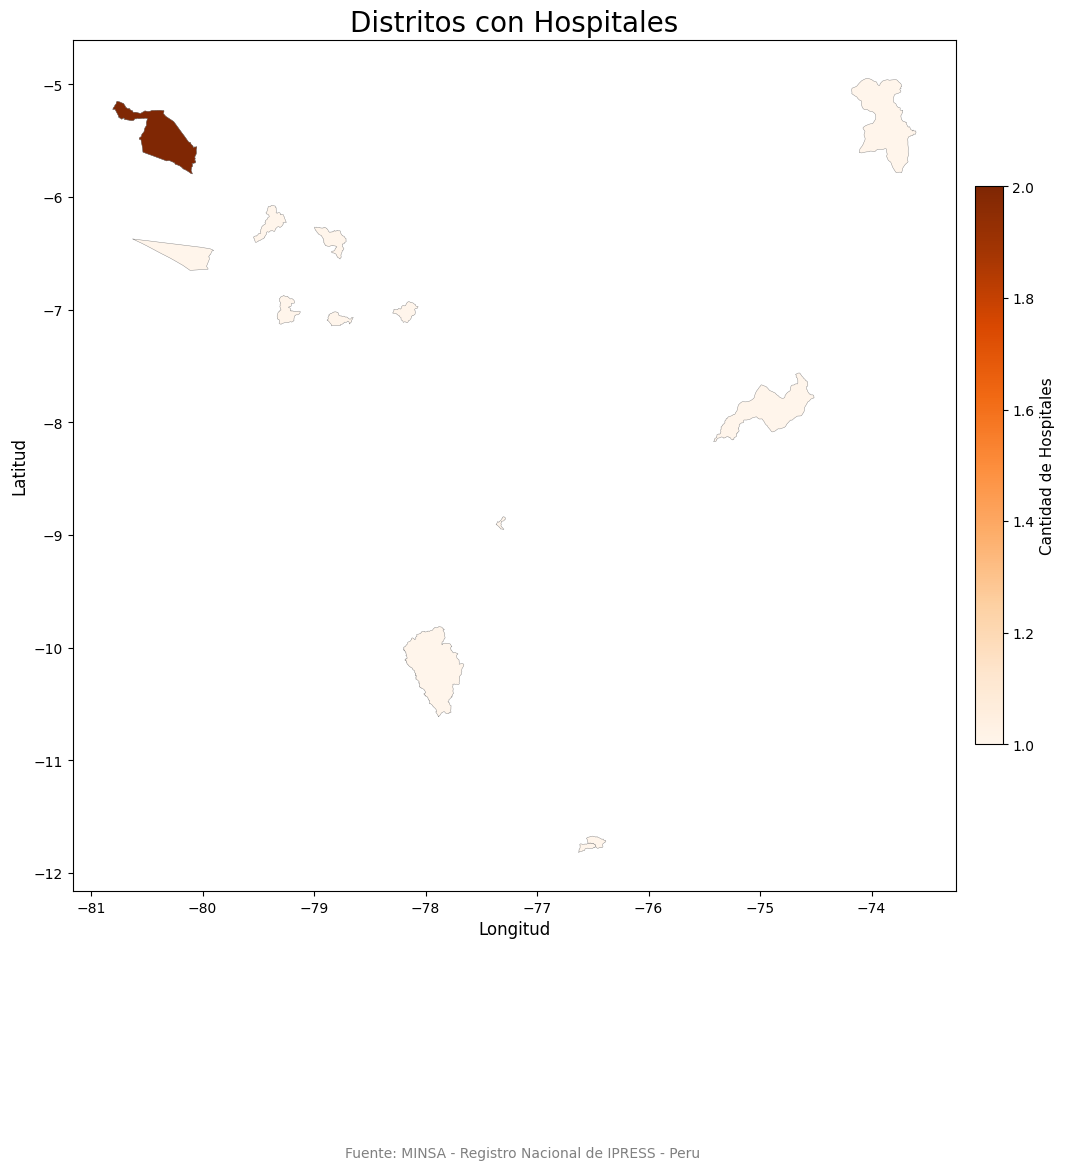

In [100]:
fig, ax = plt.subplots(figsize=(12, 14))
base_y.plot(
    column='CANTIDAD',
    cmap='Oranges',
    linewidth=0.3,
    edgecolor='gray',
    legend=False,
    ax=ax
)

ax.set_title('Distritos con Hospitales', fontsize=20)


norm = colors.Normalize(vmin=base_y['CANTIDAD'].min(), vmax=base_y['CANTIDAD'].max())
sm = cm.ScalarMappable(cmap='Oranges', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)
cbar.set_label('Cantidad de Hospitales', fontsize=11)

ax.set_xlabel("Longitud", fontsize=12)
ax.set_ylabel("Latitud", fontsize=12)


fig.text(
    0.5, 0.001, "Fuente: MINSA - Registro Nacional de IPRESS - Peru",
    ha="center", fontsize=10, color="gray"
)

plt.show()